In [4]:
# perceptron

import numpy as np 

# 가중치 -ANN > 학습의 대상

w11 = np.array([-2,2]) # weight
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3 # bias 0으로 가는 것을 방지 y = ax + b : 절편 # 가중치 연산 결과값
b2 = -1
b3 = -1

def MLP(x,w,b): # multi layer perceptron
    y = np.sum(w * x ) + b 
    # 연산의 결과는 연속적 수치 -> y/n -> 0 ~ 1 사이로 값을 매핑(sigmoid) : 0.5 > 1 , else 0
    if y <= 0:   # activation function 의 역할 : 소수점 연산 , 신경망 : 정규화
        return 0 
    else:
        return 1 

def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)

def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)

def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

print("XOR 문제")

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0],x[1])
    print("입력 값 :" + str(x) + "출력 값:" + str(y))
    
print("OR 문제")

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = OR(x[0],x[1])
    print("입력 값 :" + str(x) + "출력 값:" + str(y))

print("AND 문제")

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = AND(x[0],x[1])
    print("입력 값 :" + str(x) + "출력 값:" + str(y))



XOR 문제
입력 값 :(0, 0)출력 값:0
입력 값 :(1, 0)출력 값:1
입력 값 :(0, 1)출력 값:1
입력 값 :(1, 1)출력 값:1
OR 문제
입력 값 :(0, 0)출력 값:0
입력 값 :(1, 0)출력 값:1
입력 값 :(0, 1)출력 값:1
입력 값 :(1, 1)출력 값:1
AND 문제
입력 값 :(0, 0)출력 값:0
입력 값 :(1, 0)출력 값:0
입력 값 :(0, 1)출력 값:0
입력 값 :(1, 1)출력 값:1


(100, 2)


C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


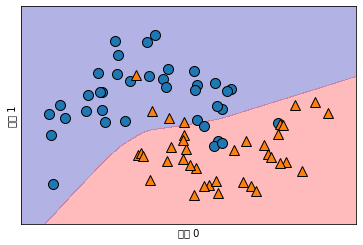

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
import mglearn # 학습에 도움을 주는 패키지

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples= 100 , noise =0.25 , random_state = 3)



print(X.shape)
X_train, X_test, y_train,y_test = train_test_split(X,y,stratify=y, random_state = 42)


# hyper parameter : optimizer
# batch_size 를 사용하는 이유는 지역해 빠지지 않기 위해서 : 0으로 갈 확률이 적어짐
# constant : 상수,

mlp = MLPClassifier(max_iter = 300 ,activation='relu', solver='adam', alpha=0.001 ,random_state=0).fit(X_train,y_train)


mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha =.3 )
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.xlabel("특성 0")
plt.ylabel("특성 1")




      

In [11]:
# 입력 생성레이어 출력
mlp.n_layers_

3

In [12]:
# 20사이즈의 단독일 경우 계싼 : 100 x 2 2 x 20
# 10, 10 두개의 레이어를 주었을 때 100x 2 2x10 10x10
mlp.coefs_ # coefficient


[array([[ 2.89542096e-01,  1.79307297e-01,  8.86668327e-02,
          2.01883452e-01, -1.07083399e-08,  1.99398963e-07,
         -5.94909639e-02,  1.70647409e-01,  2.76641481e-01,
         -1.03075018e-01,  2.37982468e-01,  2.19539807e-01,
         -2.03710444e-02,  1.06518921e-01, -1.70733509e-01,
         -3.69847054e-01, -4.73331762e-01,  2.00113047e-01,
          2.03316647e-01,  2.64943835e-01,  1.84263879e-01,
          7.79251454e-02,  1.77309871e-01,  7.90737317e-02,
         -4.64022869e-01,  1.27931743e-01,  4.20539584e-02,
          2.92147450e-01, -5.66402930e-02, -1.37782712e-01,
         -3.36061868e-01,  2.46784763e-01, -1.45626181e-01,
         -2.76758851e-09, -1.67632252e-01,  1.21286749e-01,
          2.23700152e-02,  4.10665815e-02,  2.59910156e-01,
          4.60440400e-02, -1.09588970e-01,  7.04773602e-09,
          1.12374796e-01, -4.04286873e-01,  1.77812576e-01,
          6.24881317e-02, -5.18391916e-01, -3.92958337e-01,
         -4.65586542e-02, -4.19345155e-0

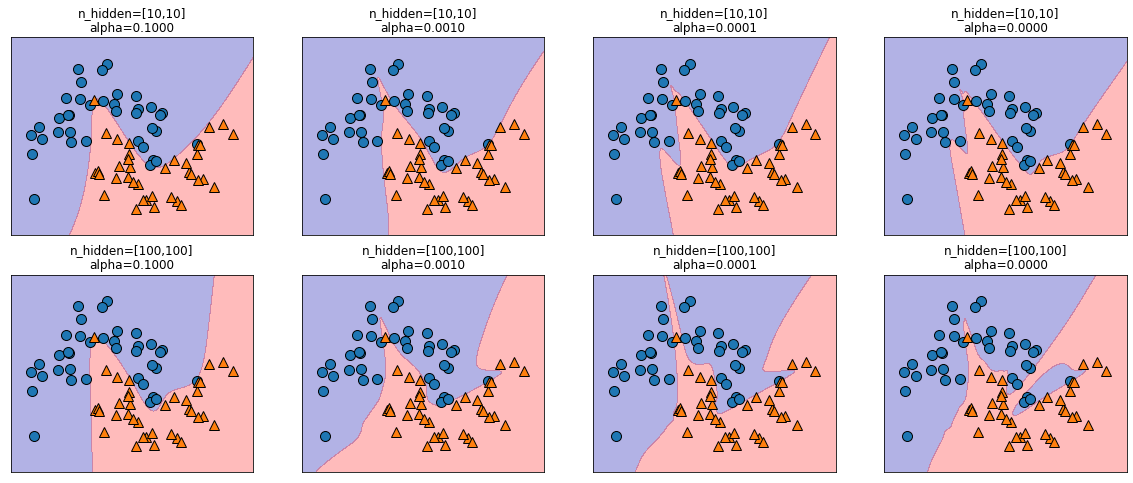

In [18]:
fig, axes= plt.subplots(2,4,figsize=(20,8))
# 100 x 2 2x10 10x10
#alpha 신경망에서의 규제 (regularization)
# 규제가크면 - 일반화 ,규제가 작으면 과적합
# 특성이 많으면 과적합
for axx, n_hidden_nodes in zip(axes,[10,100]):
    
    for ax,alpha in zip(axx,[0.1,0.001,0.0001,0.00001]):
    
        mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, ax= ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes,alpha))
    

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))


유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [65]:
# 569 x 30
from sklearn.preprocessing import MinMaxScaler




X_train, X_test , y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)



mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)

print("훈련 세트 정확도:{:.2f}".format(mlp.score(X_train,y_train))) # 94
print("훈련 세트 정확도:{:.2f}".format(mlp.score(X_test,y_test))) # 80 >> 이 될경우 과적함




훈련 세트 정확도:0.94
훈련 세트 정확도:0.92


In [77]:
mean_on_train = X_train.mean(axis=0)

std_on_train = X_train.std(axis=0)

 

X_train_scaled = (X_train - mean_on_train) / std_on_train

X_test_scaled = (X_test - mean_on_train) / std_on_train

 

# 규제 미적용 mlp = MLPClassifier(random_state=0)

# 규제 alpha=1 적용

mlp = MLPClassifier(max_iter=1000, alpha=1, solver='sgd', activation='tanh', random_state=0)

mlp.fit(X_train_scaled, y_train)

 

print('훈련 세트 정확도 {:.2f}'.format(mlp.score(X_train_scaled, y_train)))

print('테스트 세트 정확도 :{:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 0.99
테스트 세트 정확도 :0.98


In [78]:
mlp.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)>

In [71]:
# (569,30) 30 x 100 
mlp.n_layers_ # 100

3

In [76]:
import pandas as pd
co = pd.DataFrame(mlp.coefs_)
print("전체",co.shape)
print(co[0][0].shape)


전체 (2, 1)
(30, 100)
                                                   0
0  [[0.034741207116243185, 0.04524796462988237, 0...
1  [[-0.07362610520452843], [0.12891074598283817]...


Text(0, 0.5, '입력 특성')

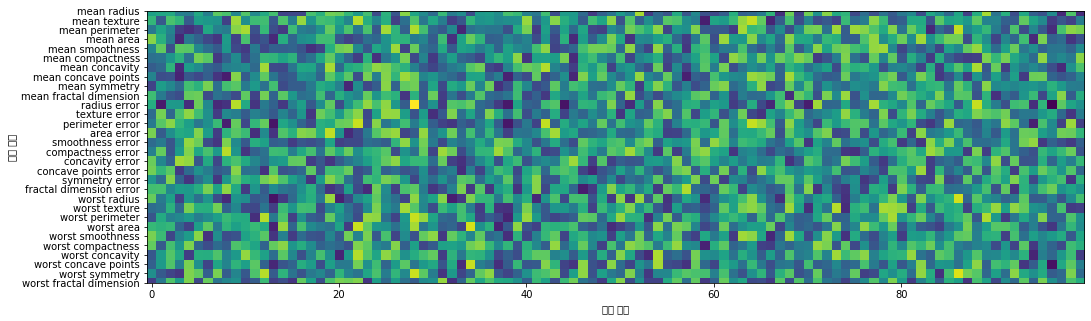

In [84]:
#(569,30) (30,100)
# 다차원방정식
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,5))
#interpolation : 보간법 - 컬러를 결정할 수 없는 경우에 주변의 값을 보고 결정하라
plt.imshow(mlp.coefs_[0], interpolation='none' ,cmap='viridis') 
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")

In [157]:
import pandas as pd
wine = pd.read_csv('./wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")


X = wine.iloc[:,1:]
Y = wine['Cultivator']





X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)




mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)


print('훈련 세트 정확도 {:.2f}'.format(mlp.score(X_train, y_train)))

print('테스트 세트 정확도 :{:.2f}'.format(mlp.score(X_test, y_test)))


훈련 세트 정확도 0.90
테스트 세트 정확도 :0.93


C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [159]:


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

SD = StandardScaler()

SD.fit(X)

X_train_scaled = SD.transform(X_train)#(X_train - mean_on_train) / std_on_train

X_test_scaled = SD.transform(X_test)#(X_test - mean_on_train) / std_on_train




mlp = MLPClassifier(max_iter=1000, alpha=1, solver='adam', activation='tanh', random_state=0)

mlp.fit(X_train_scaled, y_train)

 

print('훈련 세트 정확도 {:.2f}'.format(mlp.score(X_train_scaled, y_train)))

print('테스트 세트 정확도 :{:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 1.00
테스트 세트 정확도 :1.00


In [167]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [164]:
from sklearn.model_selection import GridSearchCV
train_size = 100 
model = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter= 1000)
model_cv = GridSearchCV(model , cv=5, 
                       param_grid={
                           'hidden_layer_sizes':[(30,30,30),(30,20,10)],
                           'alpha': [0.0001,0.001,0.01,0.1,1]
                       })

model_cv.fit(X_train,y_train)

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(30, 30, 30),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [165]:
print("모델 계수", model_cv.best_estimator_)

모델 계수 MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [168]:
# 신경망의 비지도학습

In [169]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.ndimage import convolve # convolution 연산 
    # 신경망은 fully-connected 데이터를 일차원
    # 이미지 -> 2차원 -> 일렬로 서야됨 -> 일렬로 서기전에 이미지 특징 추출
from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [170]:
#CNN

def nudge_dataset(X, Y):
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]
    print(direction_vectors)
    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()
    
    # 이미지를 특징값을 고려해서 변경값으로 변경
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y 

In [171]:
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
X =np.asarray(digits.data,'float32')
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [173]:
X,Y = nudge_dataset(X,digits.target)
X = (X - np.min(X,0)) / (np.max(X,0) + 0.0001)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state = 0)


[[[0, 1, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]


In [175]:
logistic = linear_model.LogisticRegression()
# deep learning model 학습 (gpu) , 제한된 볼트만 머신 (회로가 너무 많은)
# 비지도 학습 -> AE (시각화) ,VAE(학습중에 random 한 수를 가중치에 결합) : 분포를 학습
#GAN (화가의 화풍학습을 학습하고 학습이 끝나면 랜덤한 노이즈)
#PCA  
rbm = BernoulliRBM(random_state=0, verbose=True) # 신경망 비지도학습  > 가중치
classifier = Pipeline(steps=[('rbm',rbm),('logistic',logistic)])
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100 
logistic.C = 6000.0
classifier.fit(X_train,Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.14s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.14s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.14s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.14s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.14s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.14s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.14s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.14s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.14s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.14s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.14s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.14s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.14s
[BernoulliRBM] Iteration 15, 

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.06,
                              n_components=100, n_iter=20, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# SVM : support vector machine
- SVC, SVR  
- 규제(C) 와 모양 (gamma : 초평면의 모양을 조절 ) : 과적합을 방지
- 모델 중에서 고차원을 좋아하는 유일한 모델 
- XOR 문제 : 고차원 공간으로 이동해서 해결
- onvex hull : 집단의 외곽선을 구하는 것을 말함 : 가장 인기있는 모델 
- 스케일에 민감
- 비선형 kernel 을 지원 
    -linear 
    - poly 다항식 커널
    - rbf' 방사형 커널 : 정규분포를 이용한 고차원 공간으로서 변형
    - sigmoid 0~1 사이의 값으로 매핑
    - precomputed , default='rbf'
    


In [177]:
from sklearn.svm import SVR
import numpy as np 
n_samples , n_features = 10,5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X,y)




C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

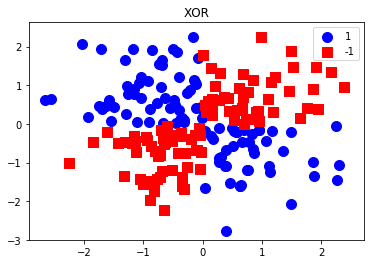

In [178]:
import numpy as np
import matplotlib.pylab as plt
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 4그룹
y_xor = np.where(y_xor, 1, -1)
plt.scatter( X_xor[y_xor ==1, 0],  X_xor[y_xor== 1, 1],  c='b', marker='o',  label='1', s=100)
plt.scatter( X_xor[y_xor==-1, 0],  X_xor[y_xor==-1, 1], c='r', marker='s',  label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR")
plt.show()

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    # 범위값 1000
    # 100 x 100 정접조합
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T),
                    XX.shape)
    plt.contourf(XX, YY, ZZ,  alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1',
                s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1',
                s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show() 

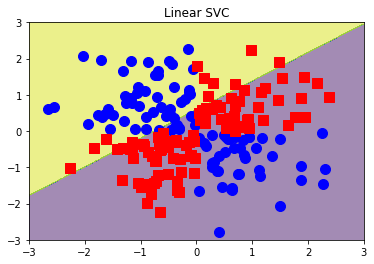

In [180]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_xor, y_xor)
plot_xor(X_xor,y_xor,svc,'Linear SVC')

In [183]:
# 다항 방정식 
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:,0] ** 2, 
                     np.sqrt(2) * X[:,0] * X[:,1], X[:,1]**2]).T
X = np.arange(8).reshape(4,2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


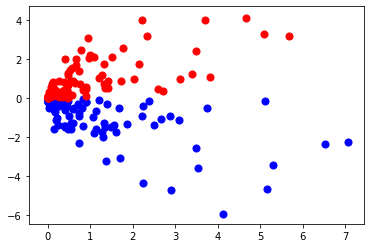

In [185]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)

plt.scatter(X_xor2[y_xor == 1,0], X_xor2[y_xor == 1, 1], c= 'b', s=50)

plt.scatter(X_xor2[y_xor== -1, 0], X_xor2[y_xor == -1, 1], c='r' , s= 50)

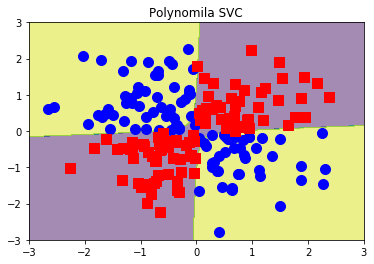

In [190]:
polysvc = SVC(kernel="poly",degree=2, gamma=1, coef0=0).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,polysvc,"Polynomila SVC")

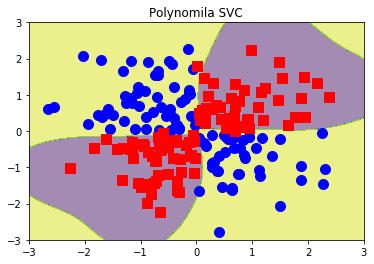

In [192]:
polysvc = SVC(kernel="rbf",degree=2, gamma=1, coef0=0).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,polysvc,"Polynomila SVC")

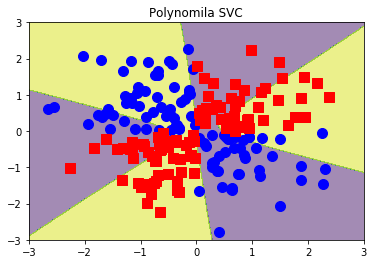

In [194]:
polysvc = SVC(kernel="sigmoid",degree=2, gamma=1, coef0=0).fit(X_xor,y_xor)
plot_xor(X_xor,y_xor,polysvc,"Polynomila SVC")

In [217]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
iris = load_iris()

x = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target)

sc = StandardScaler()
sc.fit(x)

X_train_scaled = sc.transform(X_train)

X_test_scaled = sc.transform(X_test)


polysvc = SVC(kernel="poly",degree=2, gamma=1, coef0=0).fit(X_train_scaled,y_train)
polysvc.score(X_test_scaled,y_test)




0.868421052631579